# Load functions

In [1]:
import scanpy as sc

from BigSur.feature_selection import mcfano_feature_selection
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sc.set_figure_params(dpi=100)

/Users/emmanueldollinger/miniconda3/envs/FanoFeatureSelection_new_from_scratch/lib/python3.10/site-packages/anndata/utils.py:434: FutureWarning: Importing read_csv from `anndata` is deprecated. Import anndata.io.read_csv instead.
  warnings.warn(msg, FutureWarning)
/Users/emmanueldollinger/miniconda3/envs/FanoFeatureSelection_new_from_scratch/lib/python3.10/site-packages/anndata/utils.py:434: FutureWarning: Importing read_text from `anndata` is deprecated. Import anndata.io.read_text instead.
  warnings.warn(msg, FutureWarning)
/Users/emmanueldollinger/miniconda3/envs/FanoFeatureSelection_new_from_scratch/lib/python3.10/site-packages/anndata/utils.py:434: FutureWarning: Importing read_excel from `anndata` is deprecated. Import anndata.io.read_excel instead.
  warnings.warn(msg, FutureWarning)
/Users/emmanueldollinger/miniconda3/envs/FanoFeatureSelection_new_from_scratch/lib/python3.10/site-packages/anndata/utils.py:434: FutureWarning: Importing read_mtx from `anndata` is deprecated. Im

# Setup adata

In [2]:
adata = sc.read_10x_h5('../../../Data/10k_PBMC_3p_nextgem_Chromium_X_raw_feature_bc_matrix.h5') # read in adata
adata.var_names_make_unique()
sc.pp.filter_cells(adata, min_genes=400)
sc.pp.filter_genes(adata, min_cells=3)
adata.layers['counts'] = adata.X.copy()
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

/Users/emmanueldollinger/miniconda3/envs/FanoFeatureSelection_new_from_scratch/lib/python3.10/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/emmanueldollinger/miniconda3/envs/FanoFeatureSelection_new_from_scratch/lib/python3.10/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


# Summary of BigSur usage:

Run function

In [3]:
mcfano_feature_selection(adata, layer='counts') # Replace sc.pp.highly_variable_genes(adata) call
sc.pp.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.tl.leiden(adata)

Using 0.05 for pvalue cutoff and 0.9 for mcfano quantile cutoff for highly variable genes.
After fitting, cv = 0.55


/Users/emmanueldollinger/miniconda3/envs/FanoFeatureSelection_new_from_scratch/lib/python3.10/site-packages/anndata/utils.py:434: FutureWarning: Importing read_csv from `anndata` is deprecated. Import anndata.io.read_csv instead.
  warnings.warn(msg, FutureWarning)
/Users/emmanueldollinger/miniconda3/envs/FanoFeatureSelection_new_from_scratch/lib/python3.10/site-packages/anndata/utils.py:434: FutureWarning: Importing read_text from `anndata` is deprecated. Import anndata.io.read_text instead.
  warnings.warn(msg, FutureWarning)
/Users/emmanueldollinger/miniconda3/envs/FanoFeatureSelection_new_from_scratch/lib/python3.10/site-packages/anndata/utils.py:434: FutureWarning: Importing read_excel from `anndata` is deprecated. Import anndata.io.read_excel instead.
  warnings.warn(msg, FutureWarning)
/Users/emmanueldollinger/miniconda3/envs/FanoFeatureSelection_new_from_scratch/lib/python3.10/site-packages/anndata/utils.py:434: FutureWarning: Importing read_mtx from `anndata` is deprecated. Im

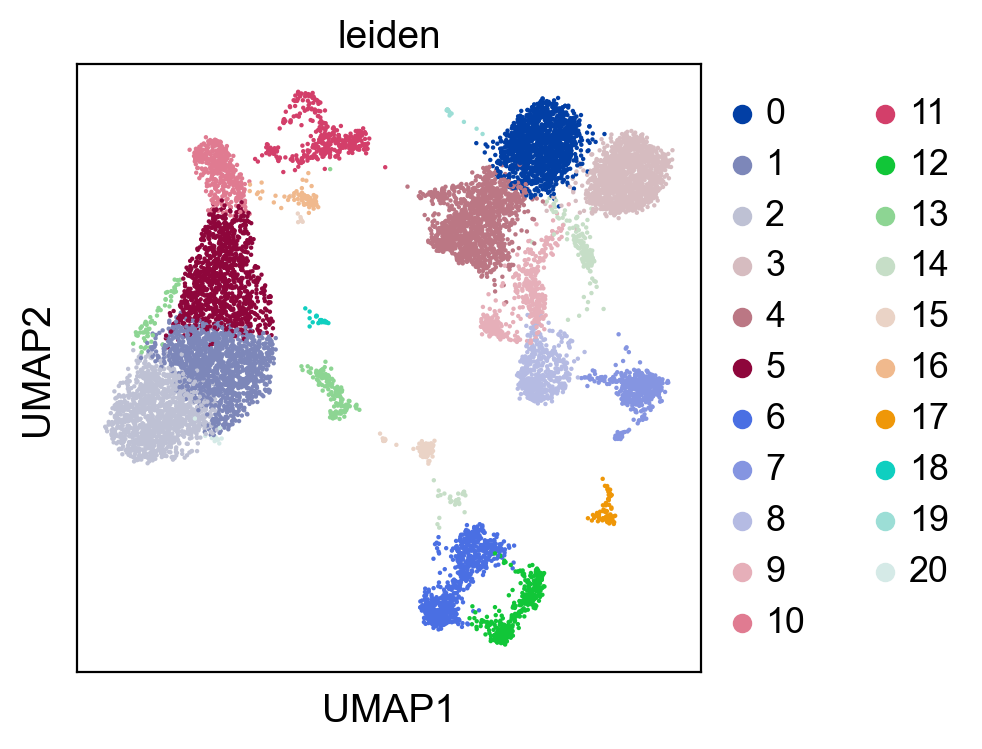

In [4]:
sc.pl.umap(adata, color='leiden')

# Checks for adata input

Reimport adata for demonstration

In [5]:
adata_testing = sc.read_10x_h5('../../../Data/10k_PBMC_3p_nextgem_Chromium_X_raw_feature_bc_matrix.h5') # read in adata
adata_testing.var_names_make_unique()
adata_testing.layers['counts'] = adata_testing.X.copy()

/Users/emmanueldollinger/miniconda3/envs/FanoFeatureSelection_new_from_scratch/lib/python3.10/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/emmanueldollinger/miniconda3/envs/FanoFeatureSelection_new_from_scratch/lib/python3.10/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Default usage: specify adata and layer of counts

We require filtering genes before usage:

In [6]:
try:
    mcfano_feature_selection(adata_testing, layer='counts')
except Exception as err:
    print(f'Exception: {err}')

Using 0.05 for pvalue cutoff and 0.9 for mcfano quantile cutoff for highly variable genes.
Exception: Zero gene means were found, remove genes with no counts before calculating mcFanos.


In [7]:
sc.pp.filter_cells(adata_testing, min_genes=400)
sc.pp.filter_genes(adata_testing, min_cells=3)

In [8]:
adata_testing.shape

(11893, 22300)

In [9]:
sc.pp.normalize_total(adata_testing, target_sum=1e4)
sc.pp.log1p(adata_testing)

We require passing counts, not normalized data:

In [10]:
try:
    mcfano_feature_selection(adata_testing, layer='X')
except Exception as err:
    print(f'Exception: {err}')

Using 0.05 for pvalue cutoff and 0.9 for mcfano quantile cutoff for highly variable genes.
Exception: This function takes raw counts, normalized data was passed.


The variability of sequencing depth across cells is addressed within the `mcfano_feature_selection` call, see the paper for more details.

# Advanced usage:

## Tool has 3 verbosity levels: none, a little and a lot

In [11]:
mcfano_feature_selection(adata, layer='counts', verbose=0)

In [12]:
mcfano_feature_selection(adata, layer='counts', verbose=1)

Using 0.05 for pvalue cutoff and 0.9 for mcfano quantile cutoff for highly variable genes.
After fitting, cv = 0.55


In [13]:
mcfano_feature_selection(adata, layer='counts', verbose=2)

Using 0.05 for pvalue cutoff and 0.9 for mcfano quantile cutoff for highly variable genes.
Calculating corrected Fano factors.
Fitting cv.
Using a coefficient of variation of 0.55.
After fitting, cv = 0.55
Finished calculating corrected Fano factors for 22300 genes in 30.035332 seconds.
Calculating p-values.
Finished calculating p-values in 21.823278 seconds.
There are 11893 cells with a median sequencing depth of 6927.0 UMI/cell. Since 25% of mcFanos are significant, we suggest selecting the top 10% of mcFanos that have p-values lower than 0.05. To do so, set min_mcfano_cutoff = 0.9.
Setting 1631 genes as highly variable.
Top 100 selected genes: 
 ['AC147651.1' 'ACRBP' 'C1QB' 'C2orf88' 'CAVIN2' 'CCL4' 'CCL5' 'CCL8'
 'CD79A' 'CDKN1C' 'CLDN5' 'CLEC1B' 'CLIC3' 'CLU' 'CMTM5' 'CST7' 'CTTN'
 'CXCL10' 'CXCL9' 'DNTT' 'FCGR3A' 'FGFBP2' 'GNG11' 'GNLY' 'GP1BB' 'GP9'
 'GZMA' 'GZMB' 'GZMH' 'GZMK' 'HBA1' 'HBA2' 'HBG2' 'HGD' 'HIST1H2AC'
 'HIST1H3H' 'HOPX' 'IFI27' 'IGHA1' 'IGHD' 'IGHG1' 'IGHG2' 'IGHG

Notice that with a verbosity of 2, we also suggest cutoffs to use for this dataset. See [How to pick cutoffs](#How-to-pick-cutoffs) within the "Advanced usage" section.

## User can pick whether to limit the number of genes called as highly variable:

In [14]:
mcfano_feature_selection(adata, layer='counts', verbose=1, n_genes_for_PCA=400)

Using 400 top genes and 0.05 for pvalue cutoff and 0.9 for mcfano quantile cutoff for highly variable genes.
After fitting, cv = 0.55


In [15]:
adata.var['highly_variable'].sum()

400

Note that by default if there is a conflict between the cutoffs and the number of genes requested by the user, the cutoffs win:

In [16]:
mcfano_feature_selection(adata, layer='counts', verbose=1, n_genes_for_PCA=10000)

Using 10000 top genes and 0.05 for pvalue cutoff and 0.9 for mcfano quantile cutoff for highly variable genes.
After fitting, cv = 0.55


/Users/emmanueldollinger/Documents/Projects/FeatureSelectionMethod/Code/bigsur_public/BigSur/BigSur/feature_selection.py:211: UserWarning: Number of genes meeting cutoffs (1631) is lower than user requested genes (10000). Only including genes meeting cutoff in "highly_variable" slot. Please increase the min_mcfano_cutoff, decrease the p_val_cutoff, or set either or both to False.
  warnings.warn(


In [17]:
adata.var['highly_variable'].sum()

1631

The $p$-value cutoff can be disabled:

In [18]:
mcfano_feature_selection(adata, layer='counts', verbose=1, p_val_cutoff=None)

Using 0.9 for mcfano quantile cutoff for highly variable genes.
After fitting, cv = 0.55


In general, we do NOT recommend turning off the $p$-value cutoff criterion; however, if analyzing a dataset with groups of cells that are well separated in gene expression space (e.g. multiple cell types), the $p$-value cutoff isn't necessary (and disabeling it can be faster computationally): 

In [19]:
mcfano_feature_selection(adata, layer='counts', verbose=2)
sc.pp.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.tl.leiden(adata)

Using 0.05 for pvalue cutoff and 0.9 for mcfano quantile cutoff for highly variable genes.
Calculating corrected Fano factors.
Fitting cv.
Using a coefficient of variation of 0.55.
After fitting, cv = 0.55
Finished calculating corrected Fano factors for 22300 genes in 29.474233 seconds.
Calculating p-values.
Finished calculating p-values in 20.565726 seconds.
There are 11893 cells with a median sequencing depth of 6927.0 UMI/cell. Since 25% of mcFanos are significant, we suggest selecting the top 10% of mcFanos that have p-values lower than 0.05. To do so, set min_mcfano_cutoff = 0.9.
Setting 1631 genes as highly variable.
Top 100 selected genes: 
 ['AC147651.1' 'ACRBP' 'C1QB' 'C2orf88' 'CAVIN2' 'CCL4' 'CCL5' 'CCL8'
 'CD79A' 'CDKN1C' 'CLDN5' 'CLEC1B' 'CLIC3' 'CLU' 'CMTM5' 'CST7' 'CTTN'
 'CXCL10' 'CXCL9' 'DNTT' 'FCGR3A' 'FGFBP2' 'GNG11' 'GNLY' 'GP1BB' 'GP9'
 'GZMA' 'GZMB' 'GZMH' 'GZMK' 'HBA1' 'HBA2' 'HBG2' 'HGD' 'HIST1H2AC'
 'HIST1H3H' 'HOPX' 'IFI27' 'IGHA1' 'IGHD' 'IGHG1' 'IGHG2' 'IGHG

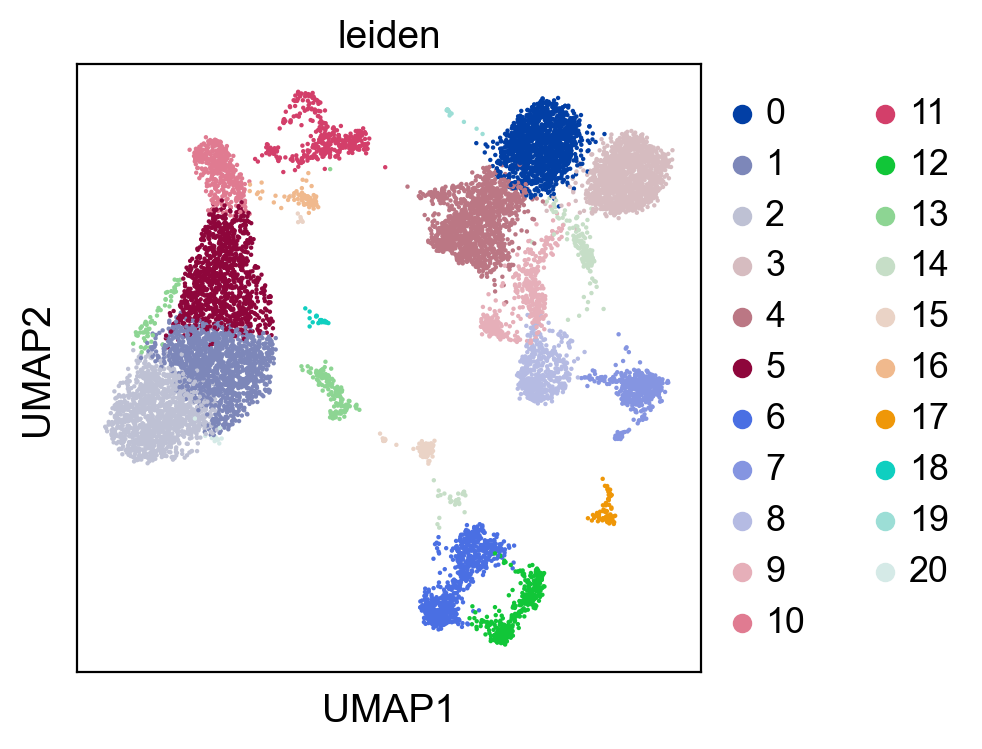

In [20]:
sc.pl.umap(adata, color='leiden')

In [21]:
mcfano_feature_selection(adata, layer='counts', p_val_cutoff=None, verbose=2)
sc.pp.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)
#sc.tl.leiden(adata) not recalculate leiden to show difference

Using 0.9 for mcfano quantile cutoff for highly variable genes.
Calculating corrected Fano factors.
Fitting cv.
Using a coefficient of variation of 0.55.
After fitting, cv = 0.55
Finished calculating corrected Fano factors for 22300 genes in 27.291634 seconds.
Skipping p-value calculation.
There are 11893 cells with a median sequencing depth of 6927.0 UMI/cell. Since 25% of mcFanos are significant, we suggest selecting the top 10% of mcFanos that have p-values lower than 0.05. To do so, set min_mcfano_cutoff = 0.9.
Setting 2230 genes as highly variable.
Top 100 selected genes: 
 ['AC147651.1' 'ACRBP' 'C1QB' 'C2orf88' 'CAVIN2' 'CCL4' 'CCL5' 'CCL8'
 'CD79A' 'CDKN1C' 'CLDN5' 'CLEC1B' 'CLIC3' 'CLU' 'CMTM5' 'CST7' 'CTTN'
 'CXCL10' 'CXCL9' 'DNTT' 'FCGR3A' 'FGFBP2' 'GNG11' 'GNLY' 'GP1BB' 'GP9'
 'GZMA' 'GZMB' 'GZMH' 'GZMK' 'HBA1' 'HBA2' 'HBG2' 'HGD' 'HIST1H2AC'
 'HIST1H3H' 'HOPX' 'IFI27' 'IGHA1' 'IGHD' 'IGHG1' 'IGHG2' 'IGHG3' 'IGHG4'
 'IGHM' 'IGHV3-15' 'IGKC' 'IGKV1-39' 'IGKV1-9' 'IGKV4-1' 'IG

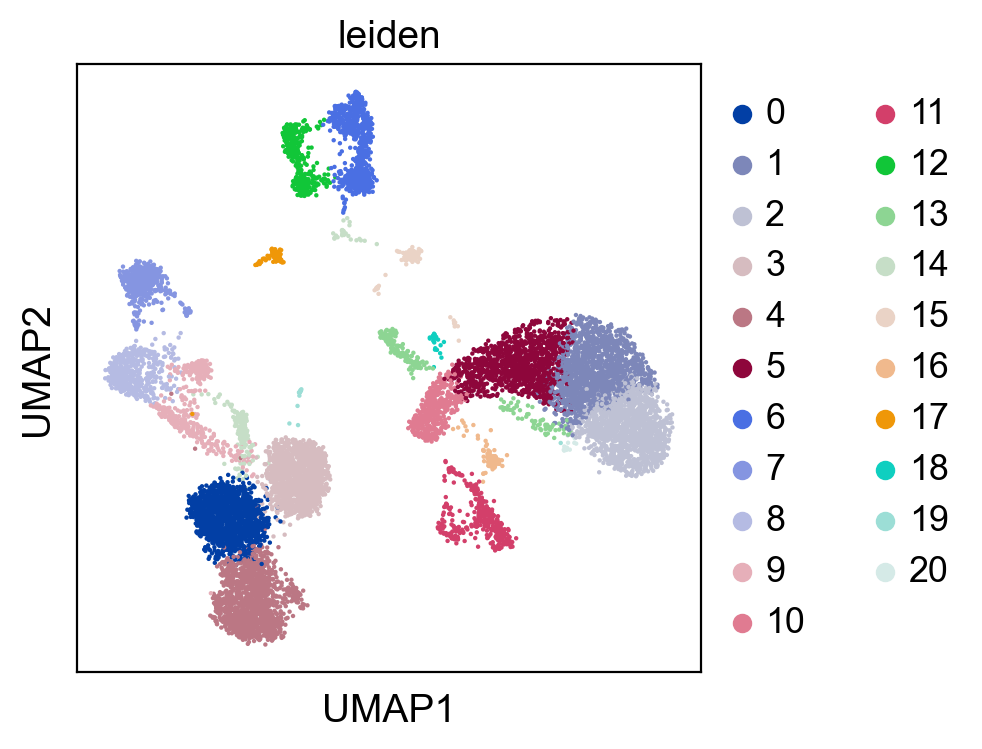

In [22]:
sc.pl.umap(adata, color='leiden')

UMAPs are similar

## How to pick cutoffs

Determining how to select the correct $\phi'$ and $p$-value cutoffs for a particular dataset depends on many aspects of the dataset, some of which are not knowable. We suggest first calculate two of the knowable statistics on which correct feature selection will depend: the number of cells and the median sequencing depth. If there are insufficient numbers of cells (less than 150, say) or the dataset is shallowly sequenced (for example, less than 3000 UMI/cell), then feature selection becomes very difficult. In these cases, we suggest selecting the top 10% of $\phi'$ that are significant, and carefully studying the results for biological meaning. If, on the other hand, the dataset has sufficient numbers of cells and sequencing depth, we then calculate the percent of $\phi'$ that are significant, which is an approximation of the homogeneity of the dataset. If there are more than 5% of $\phi'$ that are significant (i.e. the dataset can be considered to be heterogenous), we suggest selecting the top 10% of $\phi'$ that are significant, and if not, we suggest selecting the top 1%. 

However, feature selection in a dataset with many, deeply sequenced cells can still be challenging, due to unknowable characteristics of the dataset, such as the size of the groups of cells which make up the dataset (e.g. clusters). We also note that the magnitude of the statistics that determine the difficulty of the dataset were found empirically, and there could be cases in which the magnitude of one of the statistics compensates for the other (e.g., a very deeply sequenced dataset with few cells). We have found that these heurisitics work well in practice for many single-cell transcriptomics datasets; however, we urge the user to remember that these are merely guidelines, and may not work well in all cases. 

## Fitting coefficient of variation

CV is the only fitted parameter in our model. We provide a way to fit CV, which is done by default.

Note that fitting CV is only necessary if the dataset being considered is cells that are similar (i.e. intra celltype analysis). Fitting CV for inter celltype analysis will take very long and possibly won't work (function is designed to throw an error). In these cases, we suggest fixing cv = 0.5.

In [23]:
PBMC=sc.read('../../../Data/10kPBMC_working.h5ad')

PBMC.uns['log1p']['base'] = None

/Users/emmanueldollinger/miniconda3/envs/FanoFeatureSelection_new_from_scratch/lib/python3.10/site-packages/anndata/__init__.py:42: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


In [24]:
CD4 = PBMC[PBMC.obs['GroupedIdents'].isin(['CD4+ T Cells'])].copy()

sc.pp.filter_genes(CD4, min_cells=3)
mcfano_feature_selection(CD4, layer='counts') # Fit CV

Using 0.05 for pvalue cutoff and 0.9 for mcfano quantile cutoff for highly variable genes.
After fitting, cv = 0.25


## $\phi'$ and $p$-values

The modified corrected Fano factor (mcFanos, or $\phi'$) and the FDR-corrected $p$-values are stored in the anndata:

In [25]:
bigsur_df = adata.var[['mc_Fano', 'FDR_adj_pvalue']]
print(bigsur_df)

             mc_Fano  FDR_adj_pvalue
AL627309.1  1.254207        0.286164
AL627309.3  1.110905        0.631812
AL627309.5  0.978634        0.844089
AL627309.4  1.074729        0.643346
AL669831.2  0.734430        0.892634
...              ...             ...
AL592183.1  1.029868        0.455630
AC240274.1  1.113055        0.165910
AC004556.3  0.919178        1.000000
AC233755.1  0.966585        0.724883
AC007325.4  0.914883        0.948739

[22300 rows x 2 columns]


In [26]:
print(bigsur_df.loc['CD3E'])

mc_Fano            2.964617e+00
FDR_adj_pvalue    2.313238e-181
Name: CD3E, dtype: float64
